In [1]:
## Overview:
## This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines.
## Additionally, this analysis caters the needs of people who are striving to get the best cuisine ofthe country and which locality of that country serves that cuisines with maximum number ofrestaurants.
## Problem statement : In this dataset predict 2 things –
## 1) Average Cost for two
## 2) Price range 

In [2]:
## Lets import some important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
df= pd.read_csv("zomato.csv",encoding=("ISO-8859-1"))

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
## We can see there is null value in Cuisines column of data.
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,3749.0,162,73.0,8685.0,171.0,172.0,121.027535,14.565443,920.0,...,0.0,1.0,0.0,0.0,0.0,3,4.8,0.0,1.0,314
1,6304287,3173.0,162,73.0,6055.0,593.0,601.0,121.014101,14.553708,1111.0,...,0.0,1.0,0.0,0.0,0.0,3,4.5,0.0,1.0,591
2,6300002,2897.0,162,75.0,4684.0,308.0,314.0,121.056831,14.581404,1671.0,...,0.0,1.0,0.0,0.0,0.0,4,4.4,1.0,5.0,270
3,6318506,4707.0,162,75.0,8690.0,862.0,875.0,121.056475,14.585318,1126.0,...,0.0,0.0,0.0,0.0,0.0,4,4.9,0.0,1.0,365
4,6314302,5523.0,162,75.0,8689.0,862.0,875.0,121.057508,14.584450,1122.0,...,0.0,1.0,0.0,0.0,0.0,4,4.8,0.0,1.0,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443.0,208,140.0,5926.0,517.0,523.0,28.977392,41.022793,1813.0,...,11.0,0.0,0.0,0.0,0.0,3,4.1,1.0,5.0,788
9547,5908749,1311.0,208,140.0,5962.0,552.0,558.0,29.041297,41.009847,1824.0,...,11.0,0.0,0.0,0.0,0.0,3,4.2,1.0,5.0,1034
9548,5915807,3069.0,208,140.0,5966.0,554.0,561.0,29.034640,41.055817,1110.0,...,11.0,0.0,0.0,0.0,0.0,4,3.7,5.0,2.0,661
9549,5916112,513.0,208,140.0,5967.0,554.0,561.0,29.036019,41.057979,1657.0,...,11.0,0.0,0.0,0.0,0.0,4,4.0,1.0,5.0,901


In [9]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("Average Cost for two", axis=1)
y=df['Average Cost for two']

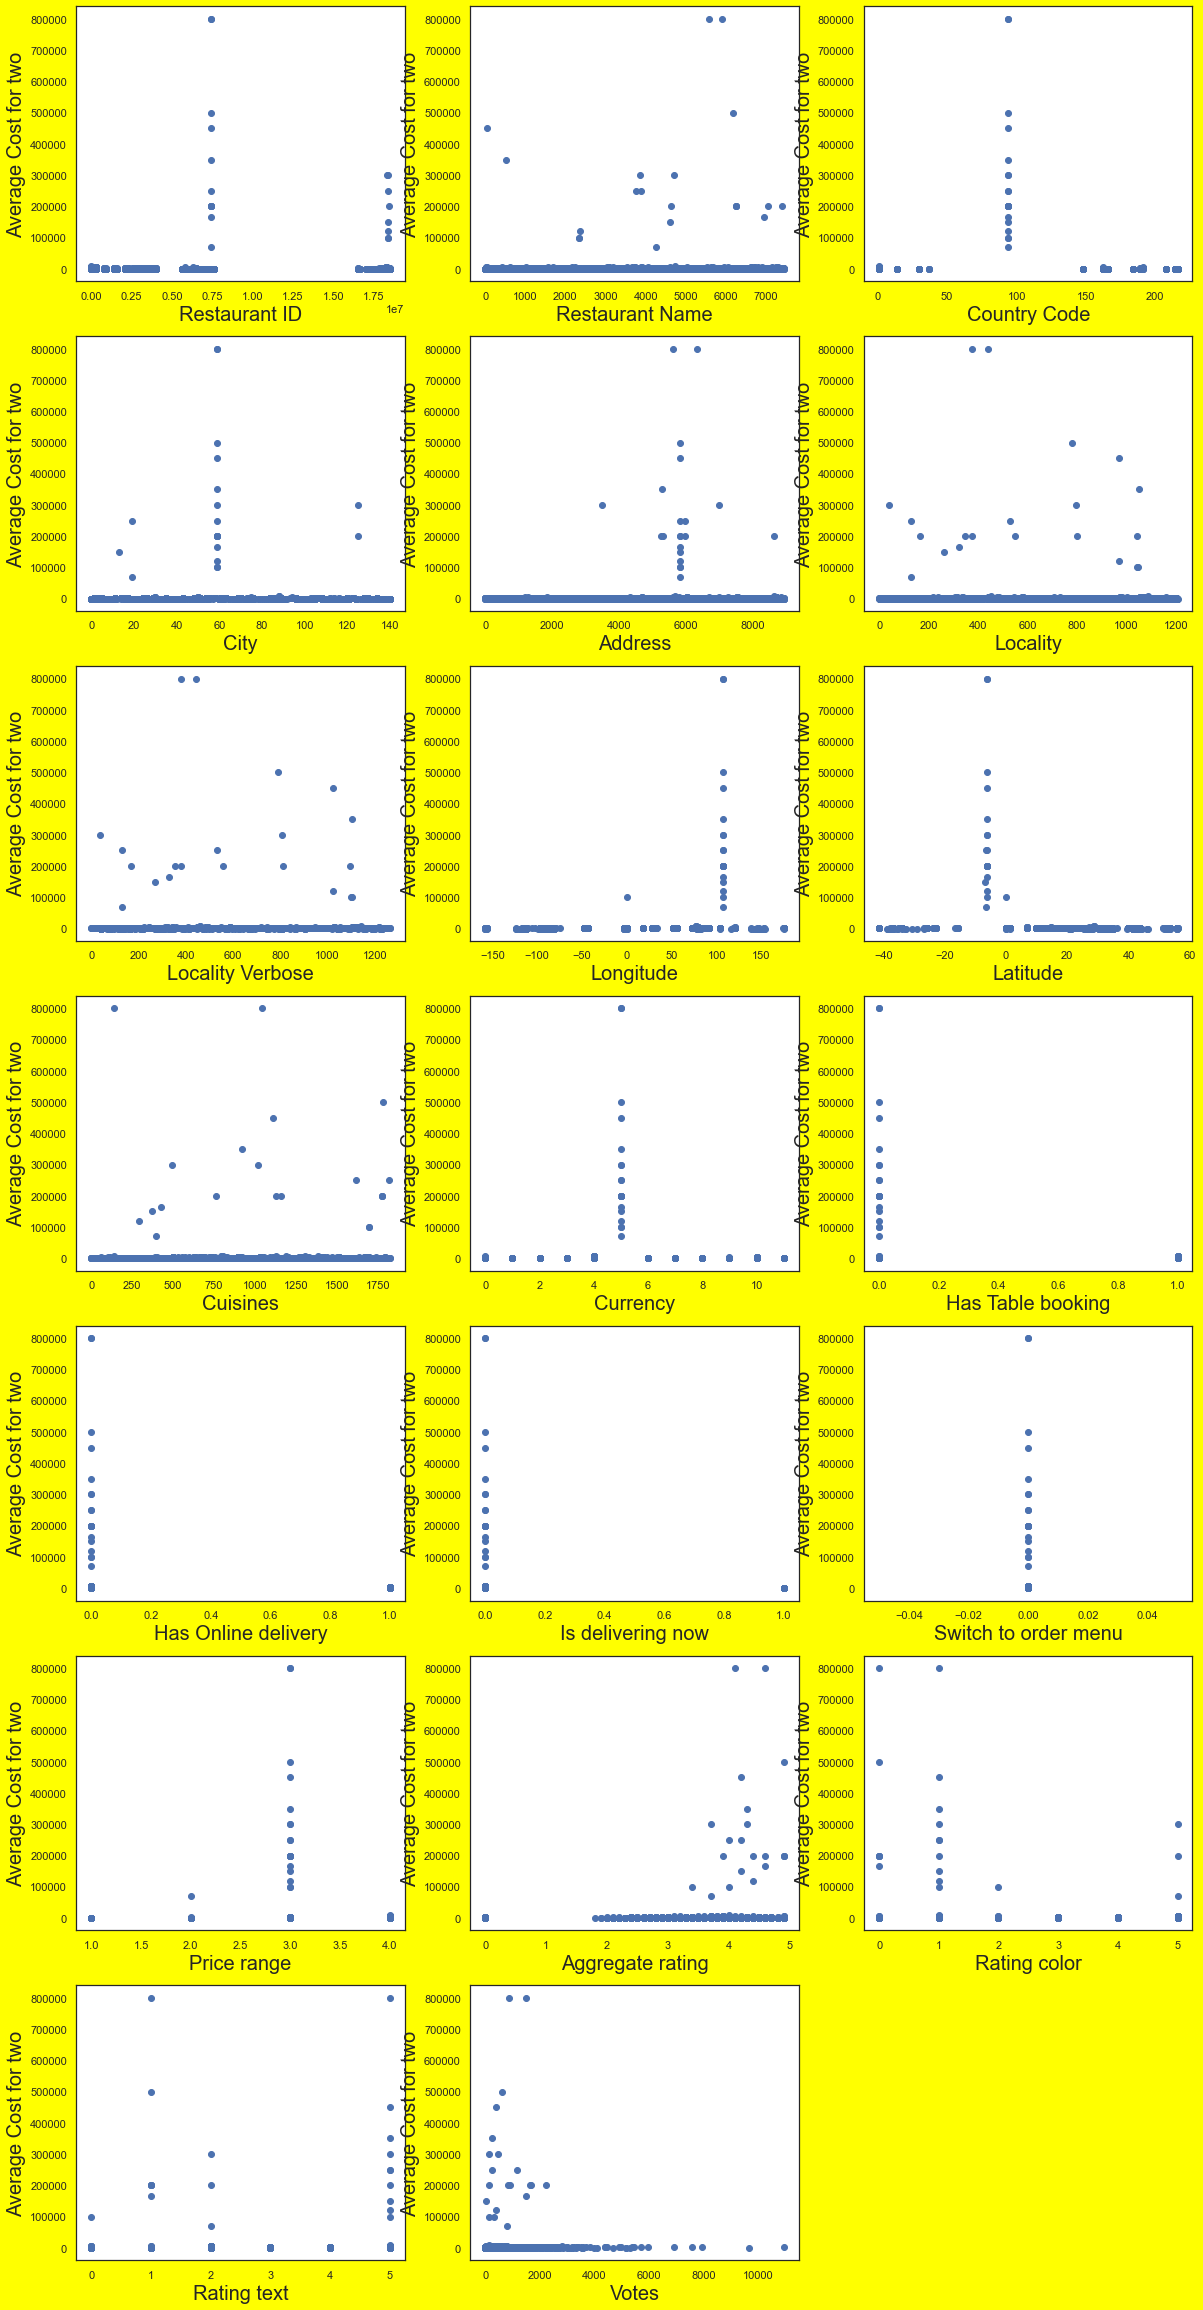

In [10]:
plt.figure(figsize=(20,90),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=50:
        ax=plt.subplot(15,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Average Cost for two',fontsize=20)
        
        plotnumber+=1
        
plt.show()

In [11]:
df=df.drop('Restaurant Name',axis=1)
df=df.drop('Locality',axis=1)
df=df.drop('Locality Verbose',axis=1)
df=df.drop('Switch to order menu',axis=1)

In [12]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("Average Cost for two", axis=1)
y=df['Average Cost for two']

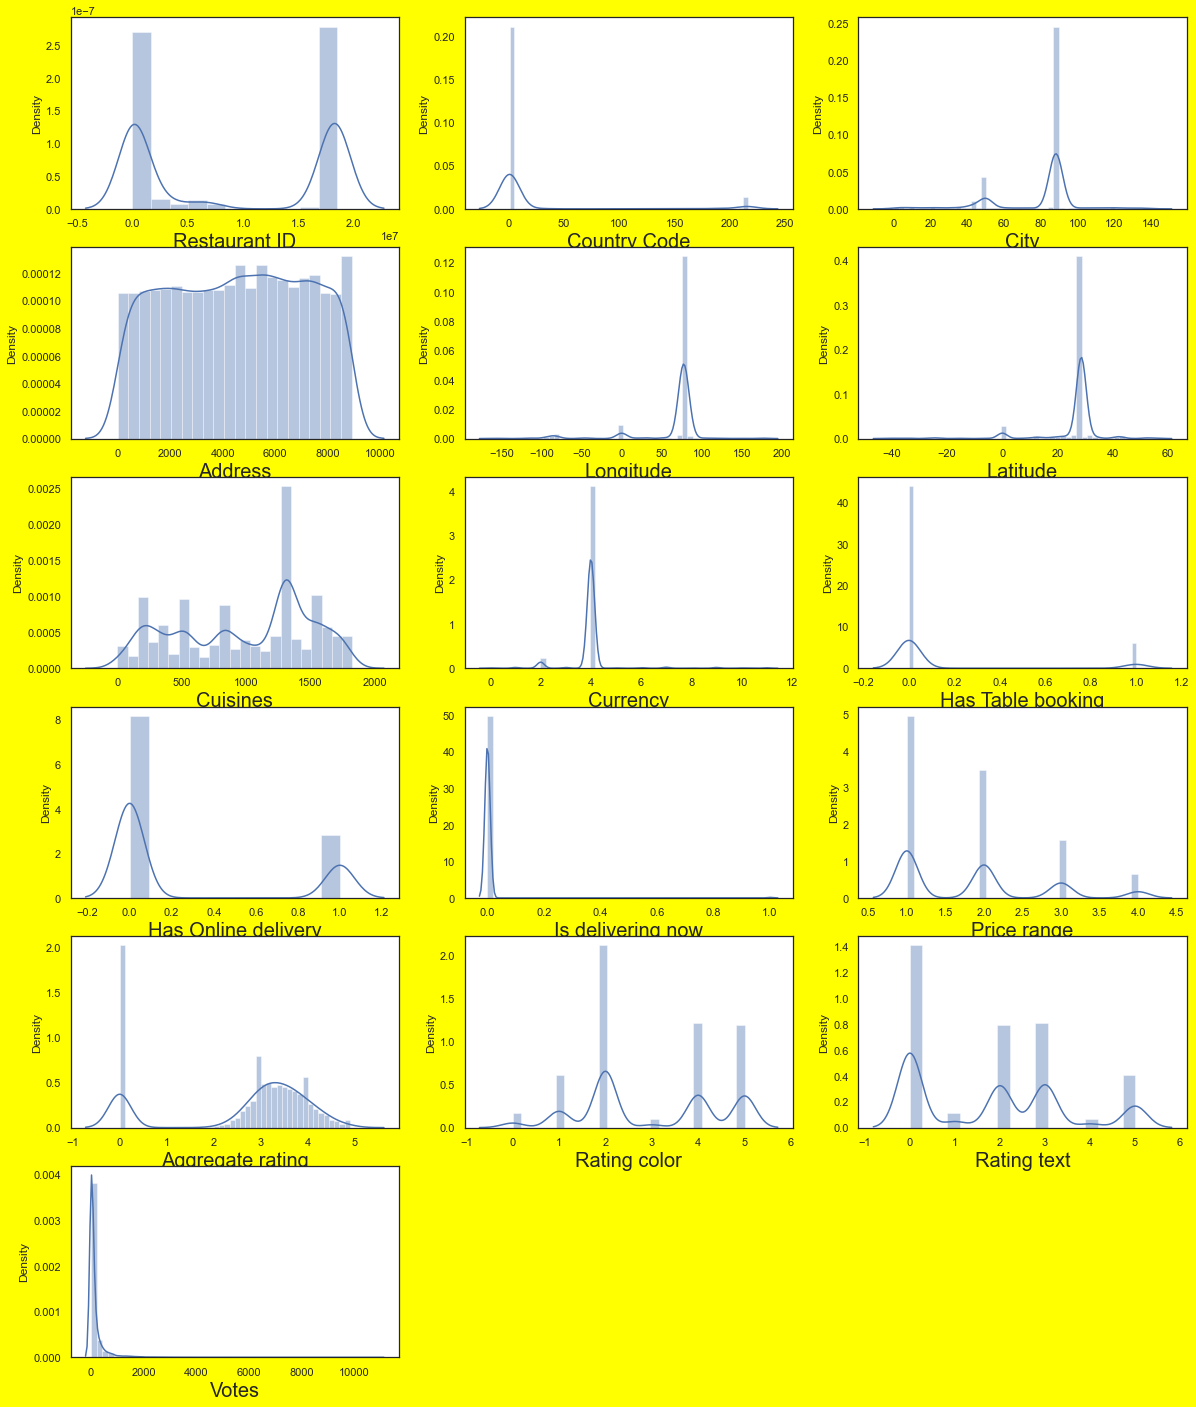

In [13]:
## Lets see how data is distributed.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=40:
        ax=plt.subplot(12,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        
        plotnumber+=1
        
plt.show()

In [14]:
df.skew()

Restaurant ID            0.061570
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

In [15]:
df['Votes']=np.sqrt(df['Votes'])
df.skew()

Restaurant ID            0.061570
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    2.518922
dtype: float64

In [16]:
## Let Normalize skewed continous data
from scipy.stats import skew
print(skew(df['Votes']))

2.518525979201597


In [17]:
df.skew()

Restaurant ID            0.061570
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    2.518922
dtype: float64

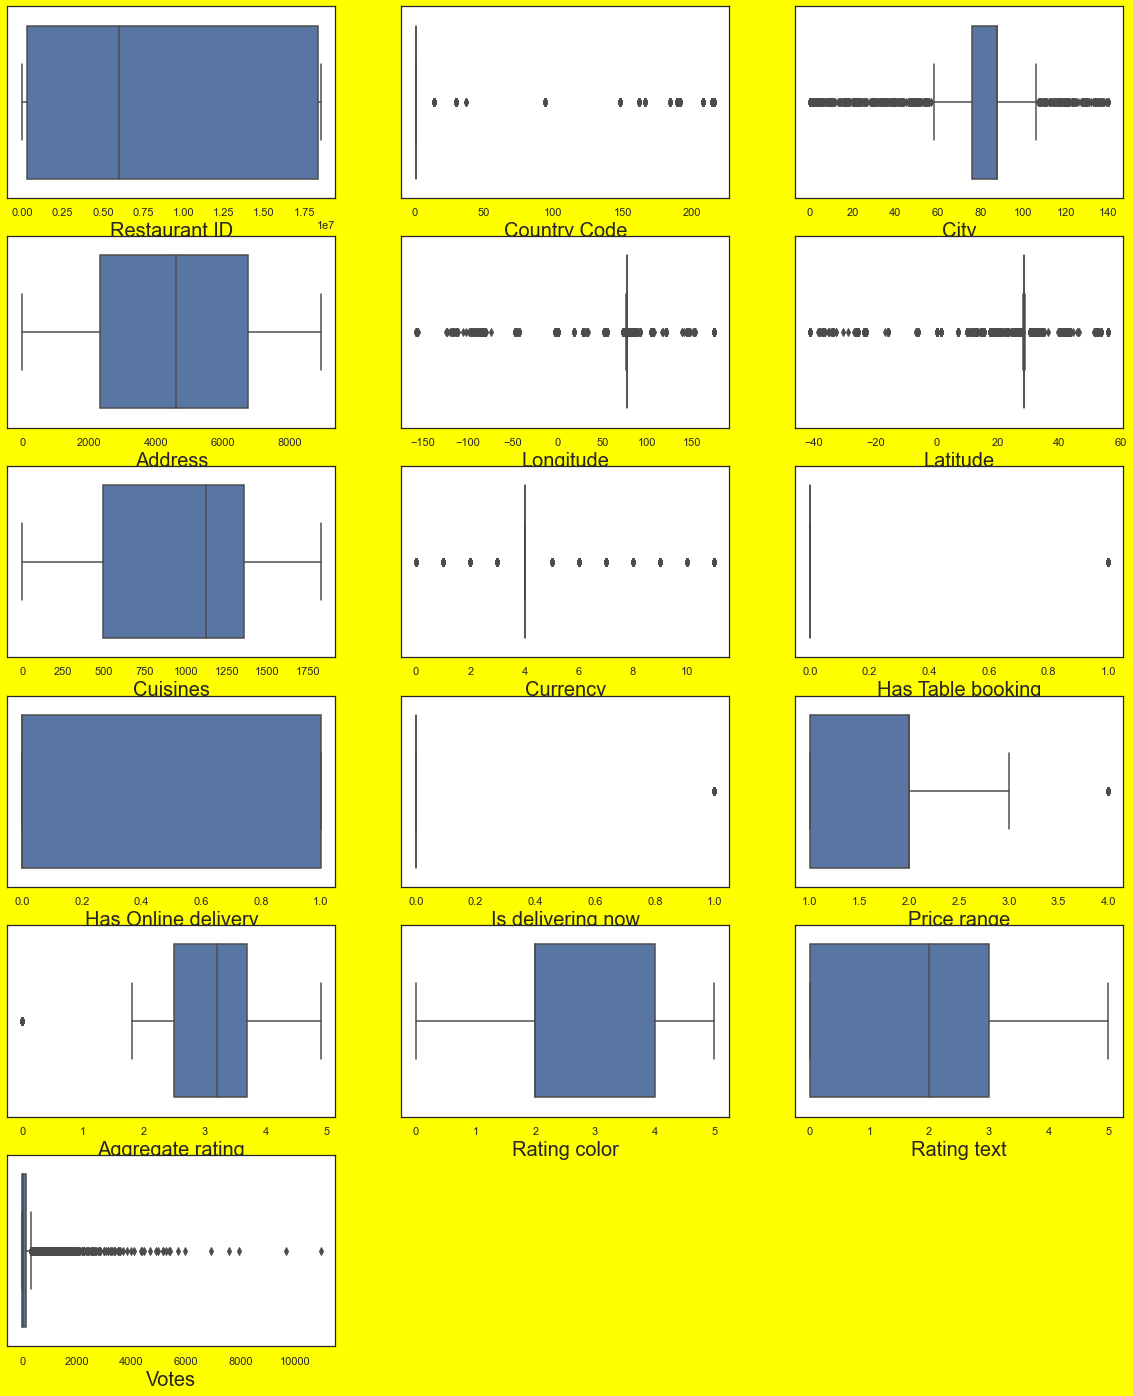

In [18]:
## Lets see how data is distributed and check outliers.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    
        plotnumber+=1
        
plt.show()

In [19]:
## we can see outliers in different columns.
q1= df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

In [20]:
df.shape

(9551, 17)

In [21]:
## I am not treating those column which has monetry value as this is going to create impact on the result because it has real values.
Longitude= (q3.Longitude+(1.5*iqr.Longitude))
Longitude
index= np.where(df['Longitude']>Longitude)
index
df= df.drop(df.index[index])
df.shape

(9118, 17)

In [22]:
## I am not treating those column which has monetry value as this is going to create impact on the result because it has real values.
Latitude= (q3.Latitude+(1.5*iqr.Latitude))
Latitude
index= np.where(df['Latitude']>Latitude)
index
df= df.drop(df.index[index])
df.shape

(8570, 17)

In [23]:

## I am not treating those column which has monetry value as this is going to create impact on the result because it has real values.
Currency= (q3.Currency+(1.5*iqr.Currency))
Currency
index= np.where(df['Currency']>Currency)
index
df= df.drop(df.index[index])
df.shape

(8488, 17)

In [24]:

## I am not treating those column which has monetry value as this is going to create impact on the result because it has real values.
Votes= (q3.Votes+(1.5*iqr.Votes))
Votes
index= np.where(df['Votes']>Votes)
index
df= df.drop(df.index[index])
df.shape

(8124, 17)

In [25]:
Data_loss=((9551-8124)/9551)*100
Data_loss

14.940843890692074

In [26]:
## Since data loss is less than 15%. We can consider it.

In [27]:
df.columns

Index(['Restaurant ID', 'Country Code', 'City', 'Address', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [28]:
## Lets do scaling to avoid partiality by model on the basis of number size.
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,2.479414,Restaurant ID
1,3.007573,Country Code
2,10.077185,City
3,4.301531,Address
4,8.728711,Longitude
5,6.322815,Latitude
6,4.646105,Cuisines
7,19.261787,Currency
8,1.625505,Has Table booking
9,1.557400,Has Online delivery


In [30]:
#Creating training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 2051.174728150147
MSE: 372445883.7300589
RMSE: 19298.857057609886


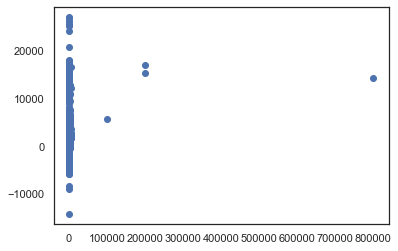

In [33]:
plt.scatter(x=y_test,y=pred)

In [34]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

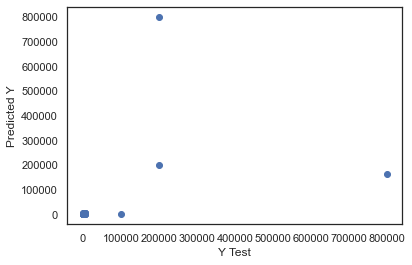

In [35]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 827.6164311878598
MSE: 404686087.585034
RMSE: 20116.811068979943


In [37]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

,Y Test,Pred
4731,350,326.5
1468,700,687.0
9037,550,572.0
7866,200,277.0
5570,400,355.5


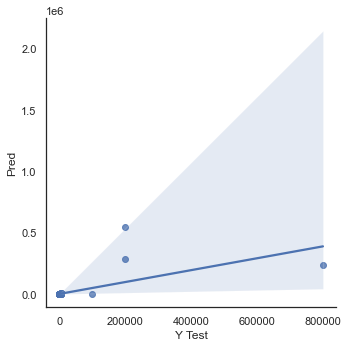

In [38]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 676.3119152276295
MSE: 236908313.09046182
RMSE: 15391.82617789266


In [40]:
## RMSE is least in RandomForestRegressor Model. So this is the best model as per our target variable 'Average Cost for two'. 

In [41]:
## Lets work on preparing a model for Price range prediction.

In [42]:
df= pd.read_csv("zomato.csv",encoding=("ISO-8859-1"))
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [43]:
## We can see there is null value in Cuisines column of data.
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [44]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,3749.0,162,73.0,8685.0,171.0,172.0,121.027535,14.565443,920.0,...,0.0,1.0,0.0,0.0,0.0,3,4.8,0.0,1.0,314
1,6304287,3173.0,162,73.0,6055.0,593.0,601.0,121.014101,14.553708,1111.0,...,0.0,1.0,0.0,0.0,0.0,3,4.5,0.0,1.0,591
2,6300002,2897.0,162,75.0,4684.0,308.0,314.0,121.056831,14.581404,1671.0,...,0.0,1.0,0.0,0.0,0.0,4,4.4,1.0,5.0,270
3,6318506,4707.0,162,75.0,8690.0,862.0,875.0,121.056475,14.585318,1126.0,...,0.0,0.0,0.0,0.0,0.0,4,4.9,0.0,1.0,365
4,6314302,5523.0,162,75.0,8689.0,862.0,875.0,121.057508,14.584450,1122.0,...,0.0,1.0,0.0,0.0,0.0,4,4.8,0.0,1.0,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443.0,208,140.0,5926.0,517.0,523.0,28.977392,41.022793,1813.0,...,11.0,0.0,0.0,0.0,0.0,3,4.1,1.0,5.0,788
9547,5908749,1311.0,208,140.0,5962.0,552.0,558.0,29.041297,41.009847,1824.0,...,11.0,0.0,0.0,0.0,0.0,3,4.2,1.0,5.0,1034
9548,5915807,3069.0,208,140.0,5966.0,554.0,561.0,29.034640,41.055817,1110.0,...,11.0,0.0,0.0,0.0,0.0,4,3.7,5.0,2.0,661
9549,5916112,513.0,208,140.0,5967.0,554.0,561.0,29.036019,41.057979,1657.0,...,11.0,0.0,0.0,0.0,0.0,4,4.0,1.0,5.0,901


In [45]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("Price range", axis=1)
y=df['Price range']

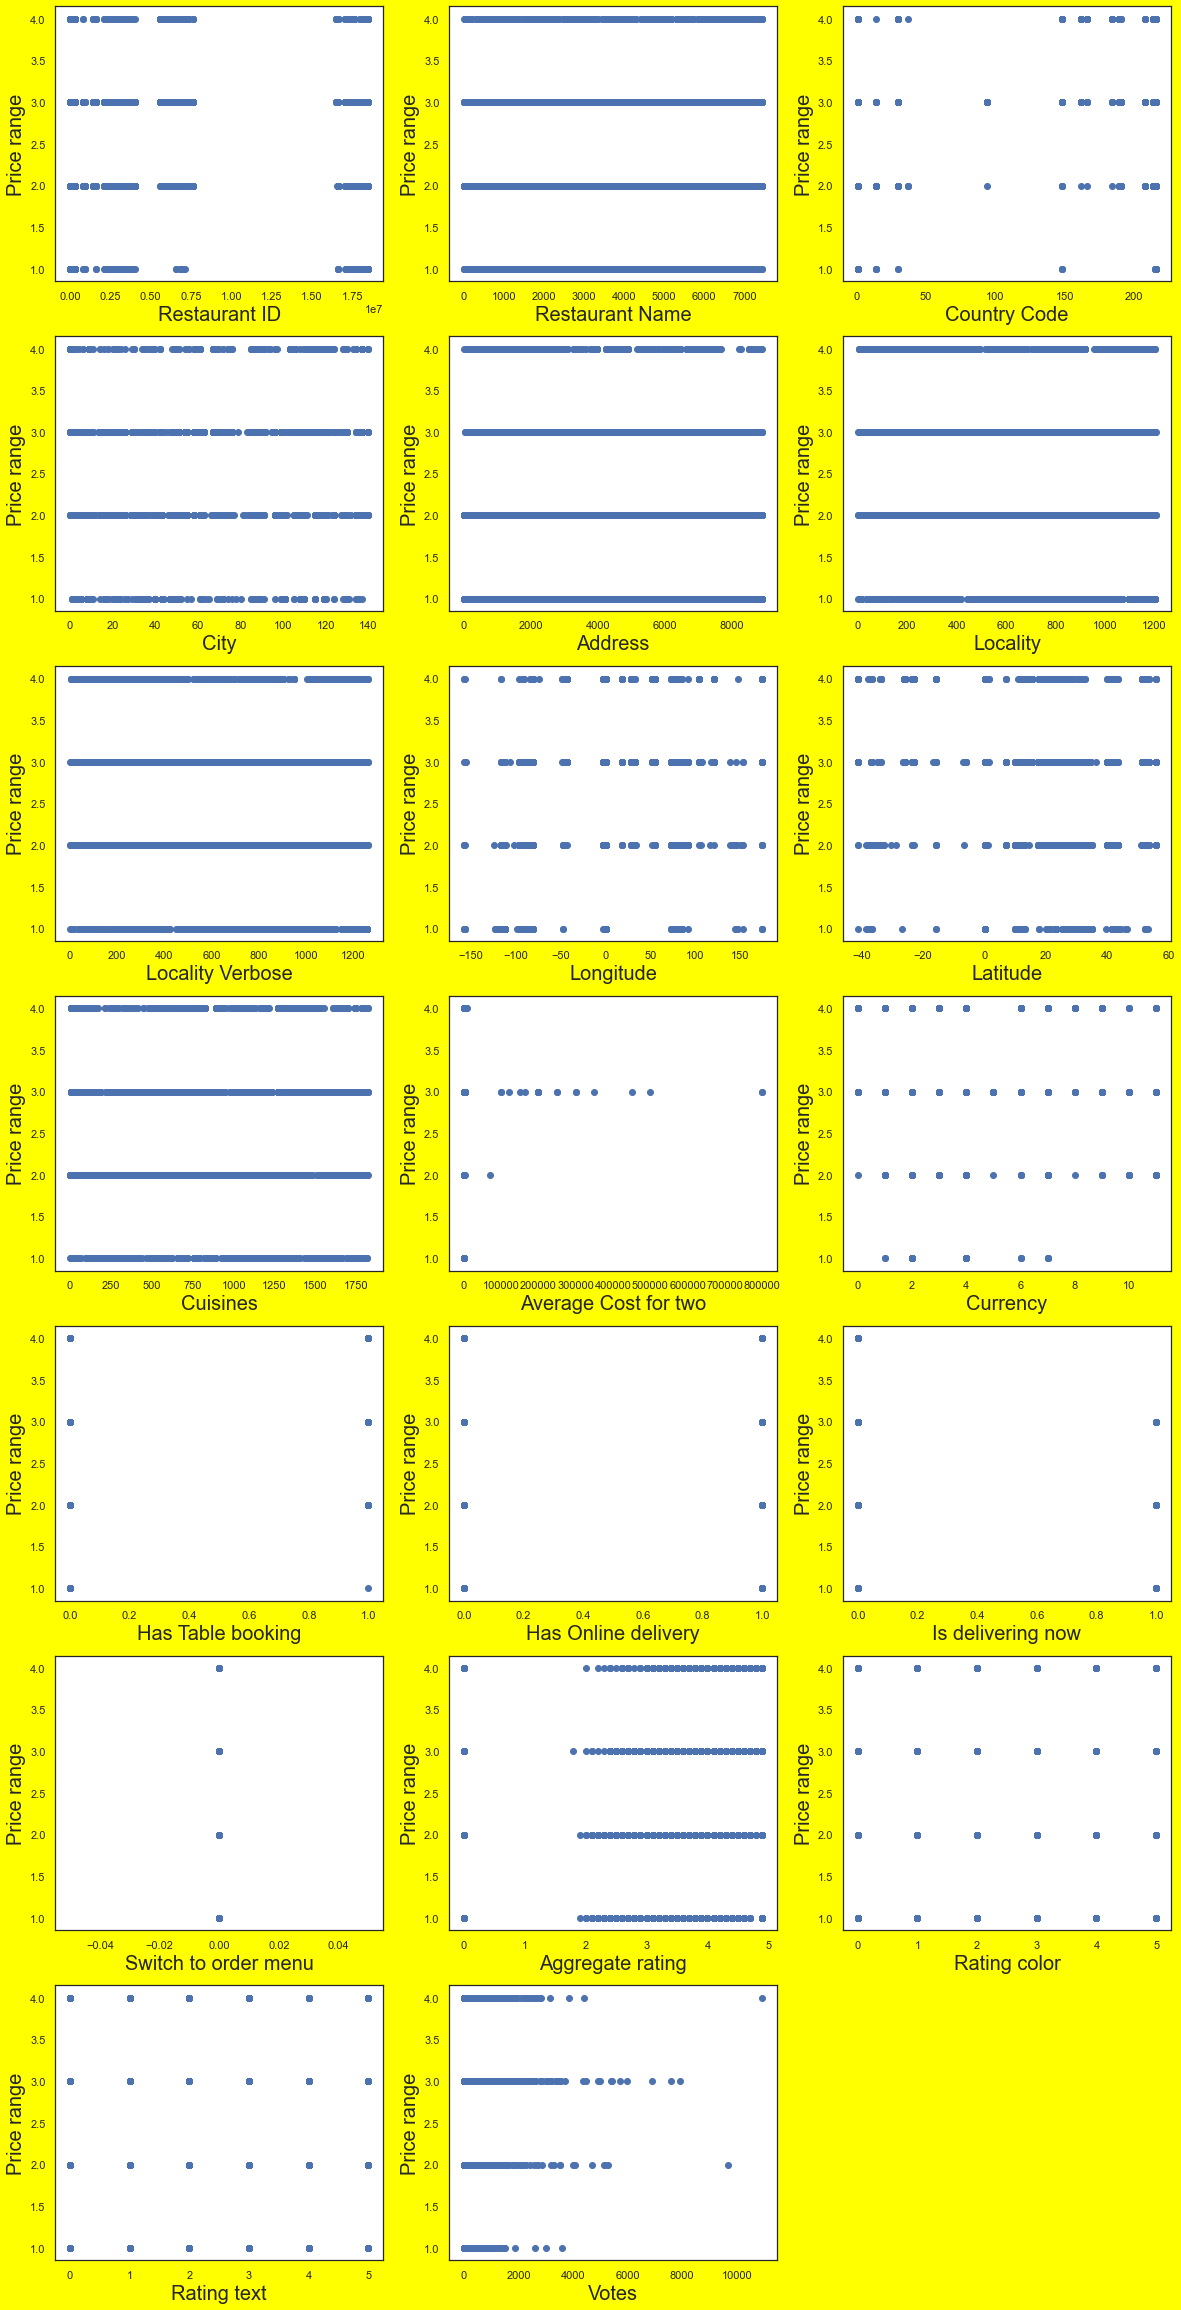

In [46]:
plt.figure(figsize=(20,90),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=50:
        ax=plt.subplot(15,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price range',fontsize=20)
        
        plotnumber+=1
        
plt.show()

In [47]:
df=df.drop('Restaurant Name',axis=1)
df=df.drop('Locality',axis=1)
df=df.drop('Locality Verbose',axis=1)
df=df.drop('Switch to order menu',axis=1)

In [48]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("Price range", axis=1)
y=df['Price range']

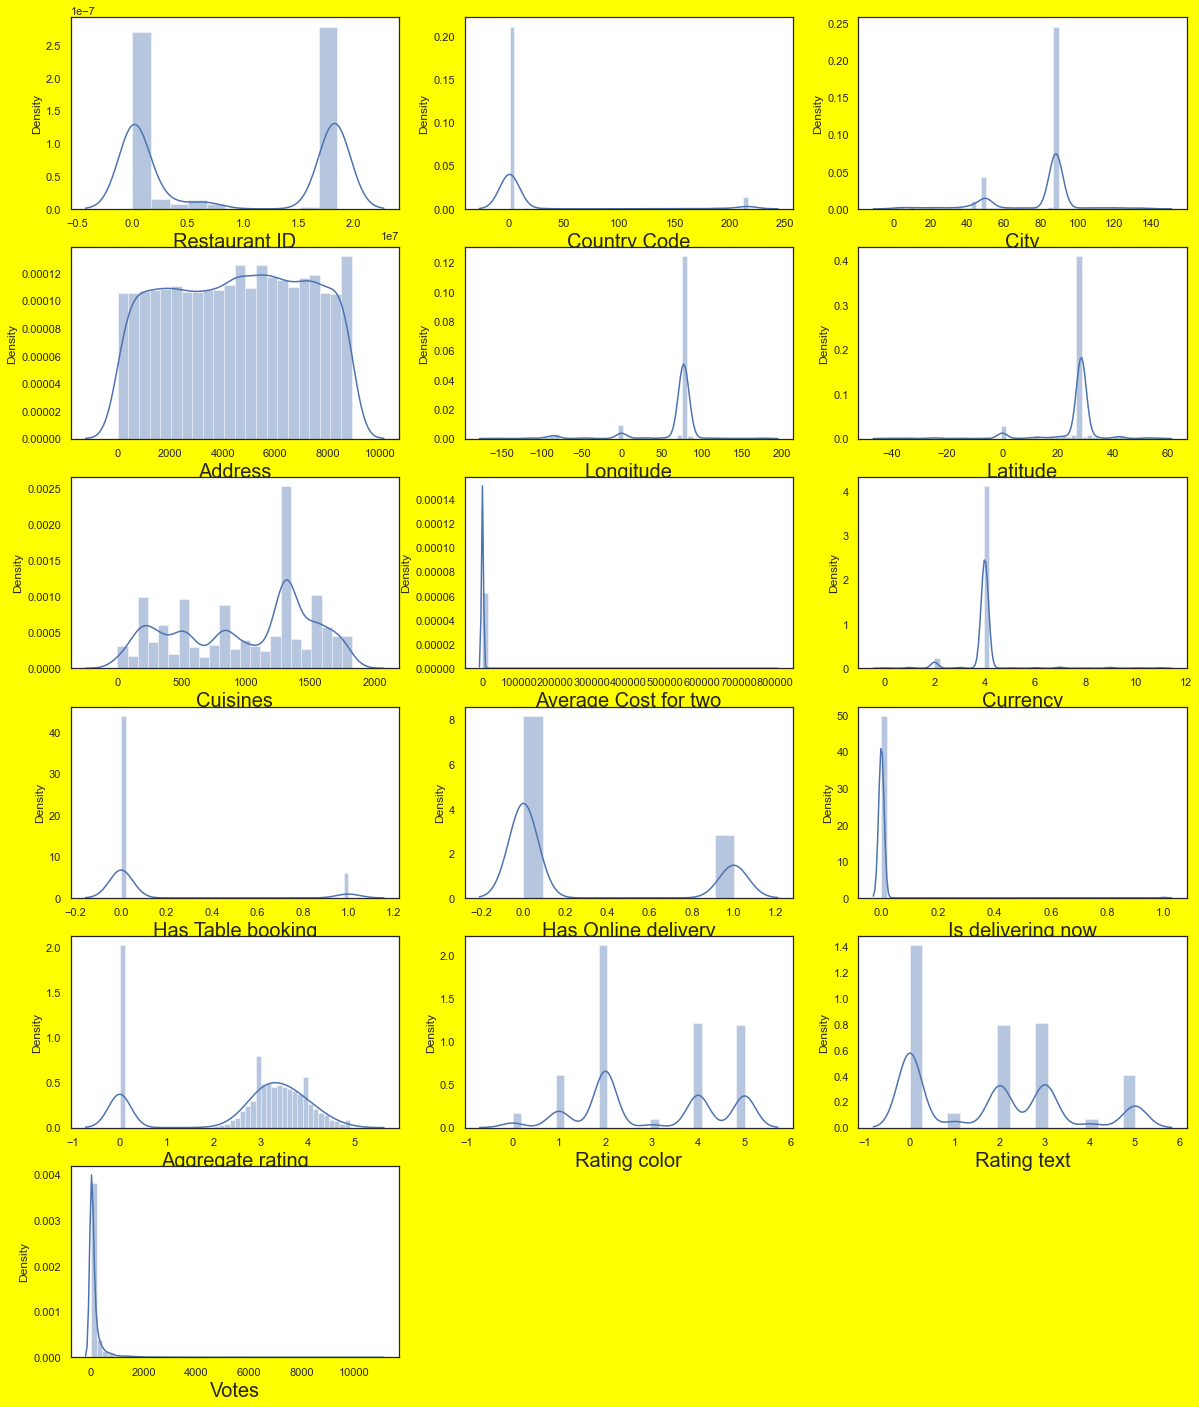

In [49]:
## Lets see how data is distributed.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=40:
        ax=plt.subplot(12,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        
        plotnumber+=1
        
plt.show()

In [50]:
df['Votes']=np.sqrt(df['Votes'])
df.skew()

Restaurant ID            0.061570
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    2.518922
dtype: float64

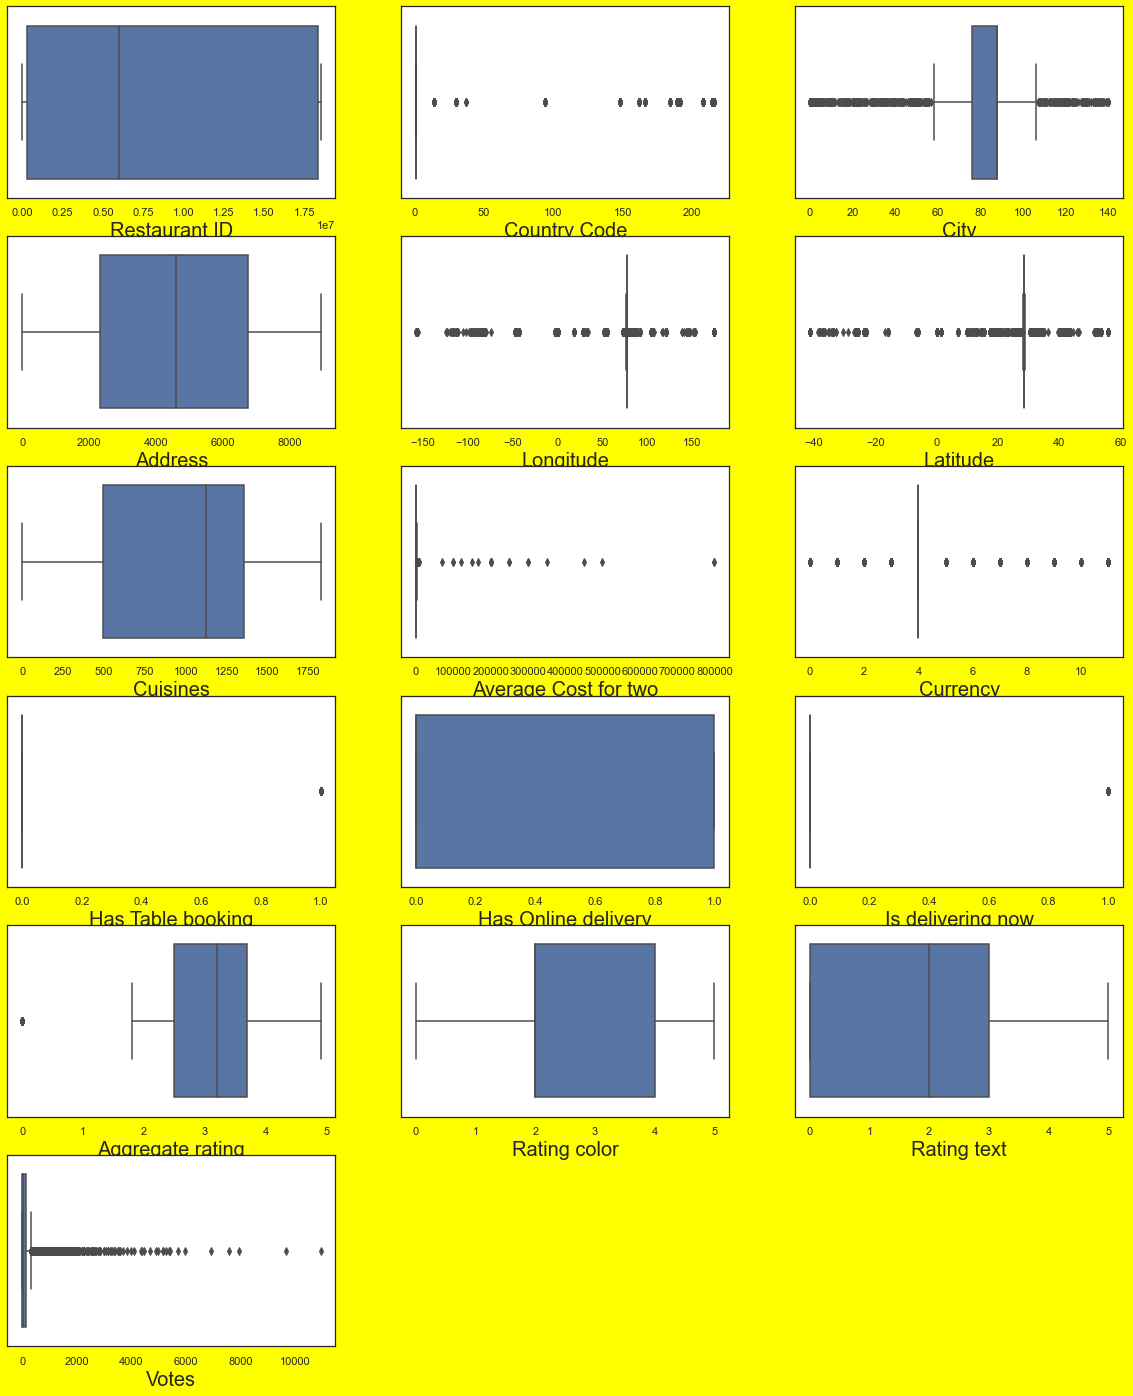

In [51]:
## Lets see how data is distributed and check outliers.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    
        plotnumber+=1
        
plt.show()

In [52]:
## we can see outliers in different columns.
q1= df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

In [53]:
## I am not treating those column which has monetry value as this is going to create impact on the result because it has real values.
Longitude= (q3.Longitude+(1.5*iqr.Longitude))
Longitude
index= np.where(df['Longitude']>Longitude)
index
df= df.drop(df.index[index])
df.shape

(9118, 17)

In [54]:
## I am not treating those column which has monetry value as this is going to create impact on the result because it has real values.
Latitude= (q3.Latitude+(1.5*iqr.Latitude))
Latitude
index= np.where(df['Latitude']>Latitude)
index
df= df.drop(df.index[index])
df.shape

(8570, 17)

In [55]:

## I am not treating those column which has monetry value as this is going to create impact on the result because it has real values.
Currency= (q3.Currency+(1.5*iqr.Currency))
Currency
index= np.where(df['Currency']>Currency)
index
df= df.drop(df.index[index])
df.shape

(8488, 17)

In [56]:
## I am not treating those column which has monetry value as this is going to create impact on the result because it has real values.
Votes= (q3.Votes+(1.5*iqr.Votes))
Votes
index= np.where(df['Votes']>Votes)
index
df= df.drop(df.index[index])
df.shape

(8124, 17)

In [57]:
Data_loss=((9551-8124)/9551)*100
Data_loss

14.940843890692074

In [58]:
df.columns

Index(['Restaurant ID', 'Country Code', 'City', 'Address', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [59]:
## Lets do scaling to avoid partiality by model on the basis of number size.
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,2.480189,Restaurant ID
1,2.928986,Country Code
2,10.012923,City
3,4.263218,Address
4,8.793120,Longitude
5,6.209870,Latitude
6,4.610532,Cuisines
7,1.040212,Average Cost for two
8,18.805802,Currency
9,1.242284,Has Table booking


In [61]:
##Creating training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
#Feature scaling, but not scaling dependent variable as it has categorical data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
## Lets split our data into train and test data
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [63]:

logreg = LogisticRegression(solver='lbfgs', random_state=40)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=40)

In [64]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

pred_logreg = logreg.predict(x_test)
Y_compare_logisticRegression = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_logreg})
print(Y_compare_logisticRegression.sample(5))

## Confusion matrix
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_logreg))

      Actual  Predicted
8937       1          2
5213       2          1
334        2          2
3589       3          3
971        1          1

Confussion matrix:
[[759 137  10   1]
 [239 320  51   8]
 [  6 108 132  20]
 [  1  27  59  33]]


In [65]:

from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_logreg))

Accuracy Score :  0.6509680795395081


In [66]:
##Lets check the classification matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           1       0.76      0.84      0.79       907
           2       0.54      0.52      0.53       618
           3       0.52      0.50      0.51       266
           4       0.53      0.28      0.36       120

    accuracy                           0.65      1911
   macro avg       0.59      0.53      0.55      1911
weighted avg       0.64      0.65      0.64      1911



In [67]:
rfc = RandomForestClassifier(n_estimators=25, criterion='gini', random_state=0,)
rfc.fit(x_train, y_train)
pred_rf = rfc.predict(x_test)
Y_compare_rfc = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_rf})
print(Y_compare_rfc.head())
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_rf))

      Actual  Predicted
4731       1          2
1468       2          2
9037       2          2
7866       1          1
5570       1          2

Confussion matrix:
[[551 330  11  15]
 [  2 564  26  26]
 [  0  13 221  32]
 [  0   0  48  72]]


In [68]:
from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_rf))

Accuracy Score :  0.7367870225013082


In [69]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=2, metric='minkowski', p=2,)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
Y_compare_knn = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_knn})
print(Y_compare_knn.head())
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_knn))

      Actual  Predicted
4731       1          2
1468       2          2
9037       2          1
7866       1          3
5570       1          2

Confussion matrix:
[[792 106   9   0]
 [345 242  29   2]
 [ 44  89 115  18]
 [  9  26  50  35]]


In [70]:

from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_knn))

Accuracy Score :  0.619570905285191


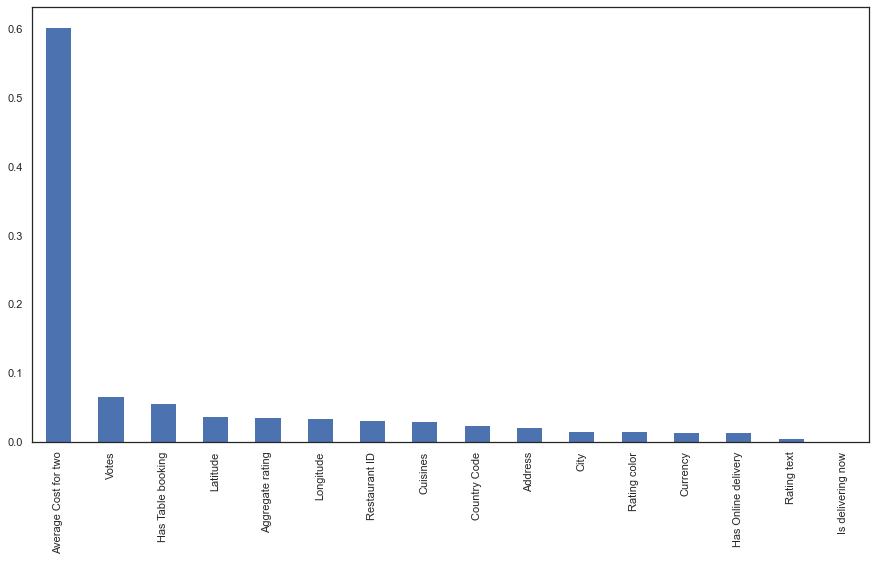

In [71]:

pd.Series(rfc.feature_importances_, 
         index = x.columns).sort_values(ascending = False).plot(kind = 'bar', 
                                                                figsize = (15,8));

In [72]:
## Conclusions
##  I have done EDA using Pandas and other plotting libraries.
##  Also made use of packages like matplotlib, plotly and seaborn to develop better insights about the data.
## I also learnt how to create new features which will in turn help us to better predict the survival.
## I get to know what are the features on which price is highly positively and negatively coorelated with.
## In this project  we can see that there are two Model need to build.
## In first one we ca see our target variable is Average Cost for two, and this this is a regression problem.
## I came to know through analysis which model will be work with better accuracy with the help of low residual and RMSE scores.
## In second project our target variable Price range which is classification problm.
## In this project we can see that Random Forest can be a good model option 
## This project helped me to understand which model to choose first and go step by step to attain results with good accuracy. 
## Also get to know where to use Linear, Decision Tree and other applicable and required models to fine tune the predictions.
## On the basis of above project we can see Random Forest has highest Accuracy value.
## In this project we have also seen importance of each features in ascending order.

In [73]:
print("                        *********************** END OF PROJECT **********************                       ")

                        *********************** END OF PROJECT **********************                       
